In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
from tqdm import tqdm # type: ignore
import pickle

warnings.filterwarnings('ignore')

### Model - Logisitc Regression

In [2]:
class LogitRegression():
    def __init__(self,learning_rate,iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weight = None
        self.bias = None

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cost(self,X,y):
        z = np.dot(X,self.weight) + self.bias
        h = self.sigmoid(z)
        n=y.shape[0]
        cost = -(1/n)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
        return cost
    
    def gradient_descent(self,X,y):
        N = y.shape[0]
        z = np.dot(X,self.weight) + self.bias
        pred = self.sigmoid(z)
        delta = pred - y
        dW = (1/N)*np.dot(X.T,delta)
        dB = (1 / N) * np.sum(delta)
        self.weight -=self.learning_rate*dW
        self.bias -=  self.learning_rate*dB


    def fit(self,X,y):
        loss = []
        N,numFeatures = X.shape
        self.weight = np.random.uniform(0, 1, numFeatures)
        self.bias = 0.0
        for i in tqdm(range(self.iterations)):
            self.gradient_descent(X,y)
            loss.append(self.cost(X,y))
        return loss



    def predict(self, X):
        z = np.dot(X, self.weight) + self.bias
        y_predicted = self.sigmoid(z)
        y_predicted_class = [1 if i >= 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)



In [3]:
df = pd.read_csv('penguins_preprocessed.csv')

In [4]:
# setting  X_train, y_train, X_test, y_test

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'male' else 0)

features = list(set(df.columns) - set(['gender']))

X = df[features].values
y = df['gender'].values

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices].astype(float)
y = y[indices].astype(float)

split_ratio = 0.8 
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(265, 13) (67, 13) (265,) (67,)


100%|██████████| 100000/100000 [00:02<00:00, 48697.84it/s]


Iteration 1 Accuracy:  0.8507


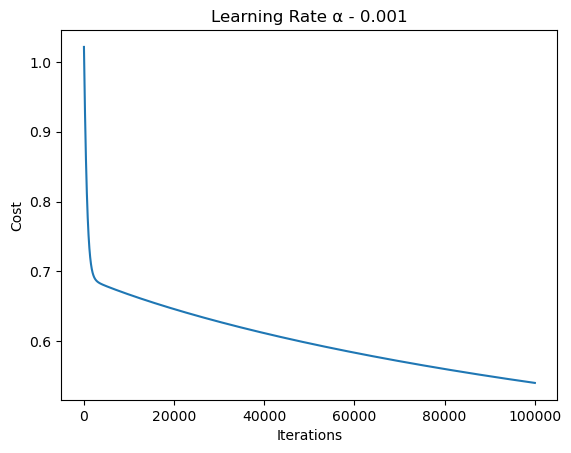

100%|██████████| 100000/100000 [00:02<00:00, 46264.57it/s]


Iteration 2 Accuracy:  0.8955


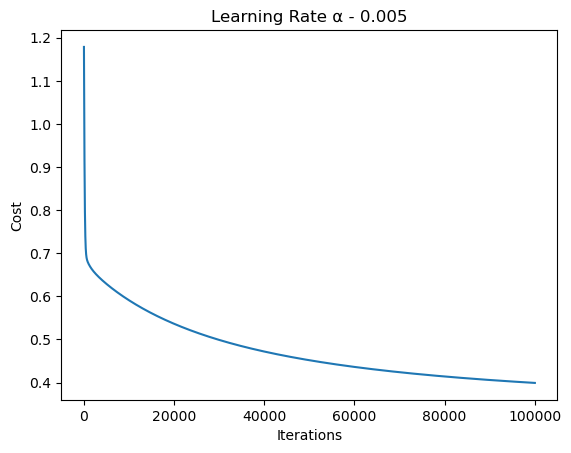

100%|██████████| 200000/200000 [00:04<00:00, 45083.40it/s]

Iteration 3 Accuracy:  0.8806


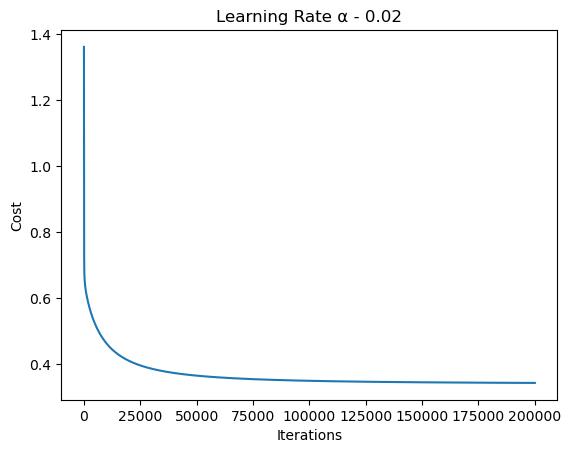

100%|██████████| 250000/250000 [00:05<00:00, 45981.82it/s]

Iteration 4 Accuracy:  0.8806


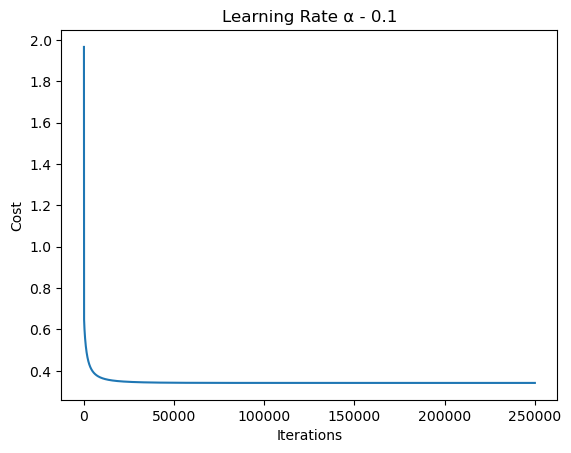

100%|██████████| 300000/300000 [00:06<00:00, 46670.35it/s]

Iteration 5 Accuracy:  0.8806


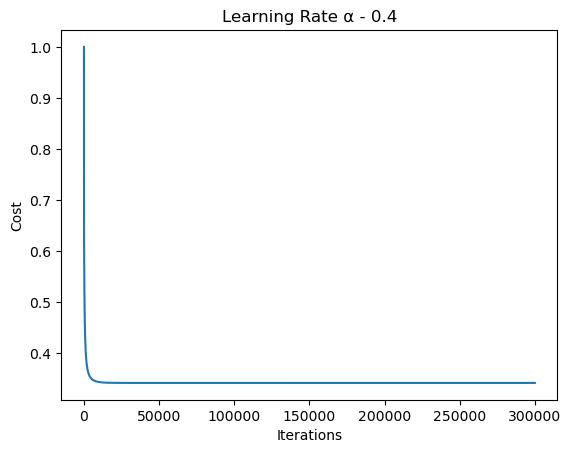

Best Accuracy:  {'learning_rate': 0.005, 'iterations': 100000, 'accuracy': 0.8955223880597015}


In [5]:
 # learning_rate , iterations
hyperparamters = [[0.001,100000],[0.005,100000],[0.02,200000],[0.1,250000],[0.4,300000]]
bestAccuracy = {"learning_rate":0.00,"iterations":0,"accuracy":0.00}
j = 1
for i in hyperparamters:
    model = LogitRegression(learning_rate=i[0] ,iterations=i[1])
    loss = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    print(f"Iteration {j} Accuracy: ",round(accuracy,4))
    if accuracy > bestAccuracy["accuracy"]:
        bestAccuracy["accuracy"]=accuracy
        bestAccuracy["learning_rate"]=i[0]
        bestAccuracy["iterations"] = i[1]

    j += 1

    plt.plot(loss)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Learning Rate ⍺ - {i[0]}")
    plt.show()

print("Best Accuracy: ",bestAccuracy)

#### Saving to Pickle

In [6]:

model = LogitRegression(learning_rate=bestAccuracy["learning_rate"], iterations=bestAccuracy["iterations"])

with open('Nikhil_Gishnu_assignment1_part2.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!
